In [29]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset using read_csv and displaying first 5 rows 

### Data Contains

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

In [30]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,1


Replacing the ? with NaN value 

In [31]:
data.replace('?',np.NaN,inplace=True)

Calculating the shape and size

In [32]:
data.shape

(303, 14)

In [33]:
data.size

4242

Calculating the sum of NULL values in each column

In [34]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

checking the datatypes of each column 

In [35]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
target        int64
dtype: object

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    object 
 12  thal      301 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


checking the mean,standard deviation,max, min values of each column

In [37]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.544554
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.498835
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


As we can see from above the ca and thal have NULL values so we are calculating value counts for that columns

In [38]:
data['ca'].value_counts()

0    176
1     65
2     38
3     20
Name: ca, dtype: int64

In [39]:
data['thal'].value_counts()

3    166
7    117
6     18
Name: thal, dtype: int64

To check the missing values rows 

In [40]:
missing=data[data.isna().any(axis=1)]

missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0,NaN,1
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,NaN,0
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3,0


So we can see from above the most frequent value is 0 for ca and 3 for thal 

So we will replace our missing values with the mode of the column.


In [41]:
data['ca'].fillna(data['ca'].mode()[0],inplace=True)

In [42]:
data.iloc[[166,192,287,302],:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,0,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,0,7,0
287,58,1,2,125,220,0,0,144,0,0.4,2,0,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,0,3,0


So from above we can see the missing values in ca are replaced


filling the missing values in thal column and checked that missing values get replaced

In [43]:
data['thal'].fillna(data['thal'].mode()[0],inplace=True)

In [44]:
data.iloc[[87,266],:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0,3,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0,3,0


In [45]:
data1 = data[data.duplicated()]
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


So from above we can see there is no duplicate data in our dataset

### Data Normalization and smoothening

Here we are using min max normalization on thalach column 

In [46]:
from sklearn import preprocessing

In [47]:
x = data['thalach'].values.astype(int)
x.max()

202

In [48]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data[['thalach']].values.astype(int))
df_normalized = pd.DataFrame(x_scaled)
data['thalach_normalized']=x_scaled
data.sort_values(by='thalach')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_normalized
245,67,1,4,120,237,0,0,71,0,1.0,2,0,3,0,0.000000
175,57,1,4,152,274,0,0,88,1,1.2,2,1,7,0,0.129771
296,59,1,4,164,176,1,2,90,0,1.0,2,2,6,0,0.145038
223,53,1,4,123,282,0,0,95,1,2.0,2,2,7,0,0.183206
154,64,1,4,120,246,0,2,96,1,2.2,3,1,3,1,0.190840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,52,1,1,118,186,0,2,190,0,0.0,2,0,6,1,0.908397
225,34,0,2,118,210,0,0,192,0,0.7,1,0,3,0,0.923664
186,42,1,3,120,240,1,0,194,0,0.8,3,0,7,0,0.938931
188,54,1,2,192,283,0,2,195,0,0.0,1,1,7,0,0.946565


#### Z-score normalization

In [49]:
from scipy import stats

In [50]:
data['zscore_oldpeak'] = stats.zscore(data['oldpeak'])
data.sort_values(by='oldpeak')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_normalized,zscore_oldpeak
302,38,1,3,138,175,0,0,173,0,0.0,1,0,3,0,0.778626,-0.896862
100,45,1,4,115,260,0,2,185,0,0.0,1,0,3,1,0.870229,-0.896862
99,48,1,4,122,222,0,2,186,0,0.0,1,0,3,1,0.877863,-0.896862
179,53,1,3,130,246,1,2,173,0,0.0,1,3,3,0,0.778626,-0.896862
184,60,0,4,158,305,0,2,161,0,0.0,1,0,3,0,0.687023,-0.896862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,59,1,1,178,270,0,2,145,0,4.2,3,0,7,0,0.564885,2.726460
191,51,1,4,140,298,0,0,122,1,4.2,2,3,7,0,0.389313,2.726460
285,58,1,4,114,318,0,1,140,0,4.4,3,3,6,0,0.526718,2.898999
123,55,1,4,140,217,0,0,111,1,5.6,3,0,7,1,0.305344,3.934233


### One hot encoding

In [51]:
data = pd.concat([data,pd.get_dummies(data['cp'],drop_first=True)],axis=1)

In [52]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_normalized,zscore_oldpeak,2,3,4
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,1,0.603053,1.087338,0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,0.282443,0.397182,0,0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0.442748,1.346147,0,0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,1,0.885496,2.122573,0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,1,0.770992,0.310912,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,0,0.465649,0.138373,0,0,0
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,0,0.534351,2.036303,0,0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,0,0.335878,0.138373,0,0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,0,0.786260,-0.896862,1,0,0


### Histogram

4


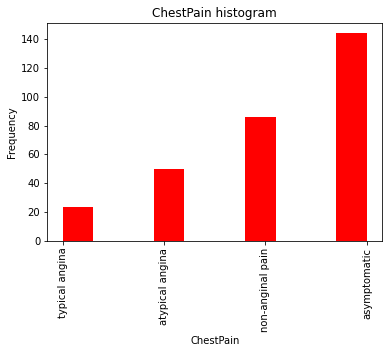

In [53]:
plt.hist(data['cp'],color='red',orientation='vertical')
plt.title("ChestPain histogram")
plt.xlabel("ChestPain")
plt.ylabel("Frequency")
cp = ("typical angina", "atypical angina", "non-anginal pain", "asymptomatic")
print(len(cp))
index = np.arange(1,len(cp)+1)
plt.xticks(index,cp,rotation=90)
plt.show()

In [54]:
X = data.iloc[:,:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [84]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
Y = pd.DataFrame(pca.fit_transform(X))
Y.head()

,0,1,2,3
0,-12.665422,2.816279,14.992618,6.795984
1,41.303628,45.289369,21.823962,0.083864
2,-17.676068,21.578740,-11.567503,11.126278
3,2.400054,-39.913487,0.825560,-10.702652
4,-43.291675,-23.860984,1.860055,-7.886838


### Correlation

Calculating the pearson correlation coefficient and making it's heat map


<AxesSubplot:>

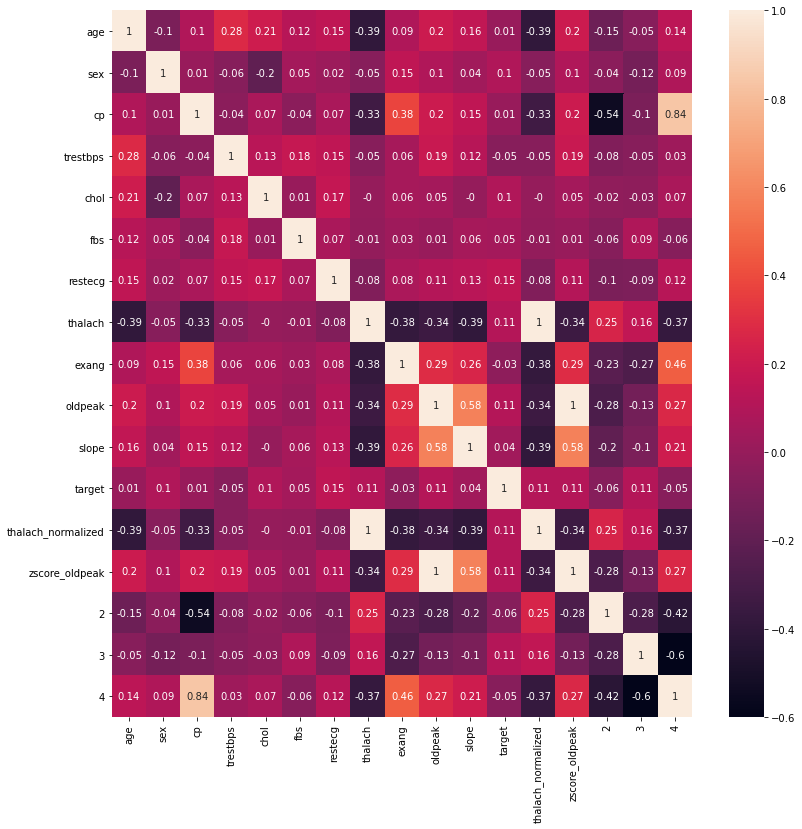

In [56]:
plt.subplots(figsize=(13,13))
correlation_matrix = data.corr(method="pearson").round(2)
sns.heatmap(correlation_matrix,annot=True)

### Sampling 

Generating 25% sample of data frame

In [79]:
df = data.sample(n=None, frac=0.25, replace=False, weights=None, random_state=None, axis=None)

In [80]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_normalized,zscore_oldpeak,2,3,4
171,53,1,4,142,226,0,2,111,1,0.0,1,0,7,0,0.305344,-0.896862,0,0,1
75,65,0,3,160,360,0,2,151,0,0.8,1,0,3,1,0.610687,-0.206705,0,1,0
247,47,1,4,110,275,0,2,118,1,1.0,2,1,3,0,0.358779,-0.034166,0,0,1
94,63,0,3,135,252,0,2,172,0,0.0,1,0,3,1,0.770992,-0.896862,0,1,0
189,69,1,3,140,254,0,2,146,0,2.0,2,3,7,0,0.572519,0.828529,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,46,1,3,150,231,0,0,147,0,3.6,2,0,3,1,0.580153,2.208842,0,1,0
35,42,1,4,140,226,0,0,178,0,0.0,1,0,3,1,0.816794,-0.896862,0,0,1
67,54,1,3,150,232,0,2,165,0,1.6,1,0,7,1,0.717557,0.483451,0,1,0
78,48,1,2,130,245,0,2,180,0,0.2,2,0,3,1,0.832061,-0.724323,1,0,0


Generating 100 samples of data frame

In [81]:
df = data.sample(n=100, frac=None, replace=False, weights=None, random_state=None, axis=None)

In [82]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,thalach_normalized,zscore_oldpeak,2,3,4
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,0,0.465649,0.138373,0,0,0
133,51,1,4,140,261,0,2,186,1,0.0,1,0,3,1,0.877863,-0.896862,0,0,1
136,70,1,4,145,174,0,0,125,1,2.6,3,0,7,1,0.412214,1.346147,0,0,1
61,46,0,3,142,177,0,2,160,1,1.4,3,0,3,1,0.679389,0.310912,0,1,0
101,34,1,1,118,182,0,2,174,0,0.0,1,0,3,1,0.786260,-0.896862,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,67,0,4,106,223,0,0,142,0,0.3,1,2,3,0,0.541985,-0.638053,0,0,1
75,65,0,3,160,360,0,2,151,0,0.8,1,0,3,1,0.610687,-0.206705,0,1,0
76,60,1,4,125,258,0,2,141,1,2.8,2,1,7,1,0.534351,1.518686,0,0,1
35,42,1,4,140,226,0,0,178,0,0.0,1,0,3,1,0.816794,-0.896862,0,0,1


### Binning 

In [100]:
data1 = pd.DataFrame(pd.cut(np.array(data['thalach']),3,labels=["low", "medium", "high"]))

In [101]:
data1

,0
0,medium
1,low
2,medium
3,high
4,high
...,...
298,medium
299,medium
300,medium
301,high
